In [1]:
# Dependencies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [2]:
# Data_Cleaning import 
Gender_Dataset = pd.read_csv("Datasets/Final_Cleaned")

# Create a data frame
Gender_Dataset.head()

,Respondent ID,Number of Rx Meds,Gender,Age at Screening,Race,Educational Attainment,Family Income to Poverty Ratio,Minutes of Vigorous Work Daily,Minutes of Moderate Work Daily,Minutes of Vigorous Recreation Daily,Minutes of Moderate Recreation Daily,Minutes of Sedentary Activity Daily,Sleep Hours Week/Workdays,Sleep Hours Weekends,Told Doctor About Sleep Issues,Feeling Tired During Day Frequency
0,109263.0,NaN,1.0,2.0,6.0,NaN,4.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109264.0,NaN,2.0,13.0,1.0,NaN,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109265.0,NaN,1.0,2.0,3.0,NaN,3.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109266.0,NaN,2.0,29.0,6.0,5.0,5.00,NaN,NaN,60.0,30.0,480.0,7.5,8.0,2.0,0.0
4,109267.0,1.0,2.0,21.0,2.0,4.0,5.00,NaN,NaN,90.0,NaN,540.0,8.0,8.0,2.0,2.0


In [3]:
# Comparing "gender"  and "Family Income to Poverty Ratio" with "Minutes of Vigorous Recreation Daily," "Minutes of Moderate Recreation Daily", and 
# "Minutes of Sedentary Activity Daily" compared to sleep constants

# Sleep constants: "Sleep Hours Week/Workdays", "Sleep Hours Weekends"

#Gender_Dataset = Gender_Dataset.drop(columns=['Number of Rx Meds', 'Age at Screening', 'Educational Attainment',
#                                      'Minutes of Vigorous Work Daily',	
#                                     'Minutes of Moderate Work Daily',
#                                     'Told Doctor About Sleep Issues', 'Feeling Tired During Day Frequency'
    
#                     ])
Gender_Dataset

,Respondent ID,Number of Rx Meds,Gender,Age at Screening,Race,Educational Attainment,Family Income to Poverty Ratio,Minutes of Vigorous Work Daily,Minutes of Moderate Work Daily,Minutes of Vigorous Recreation Daily,Minutes of Moderate Recreation Daily,Minutes of Sedentary Activity Daily,Sleep Hours Week/Workdays,Sleep Hours Weekends,Told Doctor About Sleep Issues,Feeling Tired During Day Frequency
0,109263.0,NaN,1.0,2.0,6.0,NaN,4.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109264.0,NaN,2.0,13.0,1.0,NaN,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109265.0,NaN,1.0,2.0,3.0,NaN,3.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109266.0,NaN,2.0,29.0,6.0,5.0,5.00,NaN,NaN,60.0,30.0,480.0,7.5,8.0,2.0,0.0
4,109267.0,1.0,2.0,21.0,2.0,4.0,5.00,NaN,NaN,90.0,NaN,540.0,8.0,8.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15555,124818.0,NaN,1.0,40.0,4.0,5.0,3.82,NaN,NaN,NaN,NaN,420.0,6.0,7.0,2.0,2.0
15556,124819.0,NaN,1.0,2.0,4.0,NaN,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15557,124820.0,NaN,2.0,7.0,3.0,NaN,1.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15558,124821.0,4.0,1.0,63.0,4.0,2.0,3.71,10.0,NaN,NaN,NaN,60.0,8.0,9.0,2.0,2.0


In [4]:
Gender_Dataset.columns

Index(['Respondent ID', 'Number of Rx Meds', 'Gender', 'Age at Screening',
       'Race', 'Educational Attainment', 'Family Income to Poverty Ratio',
       'Minutes of Vigorous Work Daily', 'Minutes of Moderate Work Daily',
       'Minutes of Vigorous Recreation Daily',
       'Minutes of Moderate Recreation Daily',
       'Minutes of Sedentary Activity Daily', 'Sleep Hours Week/Workdays',
       'Sleep Hours Weekends', 'Told Doctor About Sleep Issues',
       'Feeling Tired During Day Frequency'],
      dtype='object')

In [5]:
Gender_Dataset.describe()
Gender_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15560 entries, 0 to 15559
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Respondent ID                         15560 non-null  float64
 1   Number of Rx Meds                     6844 non-null   float64
 2   Gender                                15560 non-null  float64
 3   Age at Screening                      15560 non-null  float64
 4   Race                                  15560 non-null  float64
 5   Educational Attainment                9232 non-null   float64
 6   Family Income to Poverty Ratio        13359 non-null  float64
 7   Minutes of Vigorous Work Daily        2402 non-null   float64
 8   Minutes of Moderate Work Daily        4164 non-null   float64
 9   Minutes of Vigorous Recreation Daily  2417 non-null   float64
 10  Minutes of Moderate Recreation Daily  3893 non-null   float64
 11  Minutes of Sede

In [6]:
print(Gender_Dataset.count())

Respondent ID                           15560
Number of Rx Meds                        6844
Gender                                  15560
Age at Screening                        15560
Race                                    15560
Educational Attainment                   9232
Family Income to Poverty Ratio          13359
Minutes of Vigorous Work Daily           2402
Minutes of Moderate Work Daily           4164
Minutes of Vigorous Recreation Daily     2417
Minutes of Moderate Recreation Daily     3893
Minutes of Sedentary Activity Daily      9676
Sleep Hours Week/Workdays               10105
Sleep Hours Weekends                    10099
Told Doctor About Sleep Issues          10195
Feeling Tired During Day Frequency      10195
dtype: int64


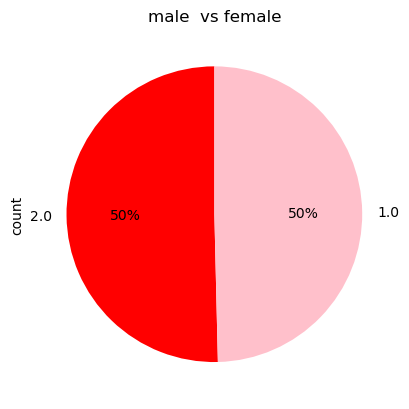

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Gender = Gender_Dataset['Gender'].value_counts()

# Calculate the count of each gender in your DataFrame
Gender_Pie_plot = Gender_Dataset['Gender'].value_counts()

# Create a pie plot using Pandas
Gender.plot(kind="pie", autopct="%1.0f%%", startangle=90, title="male  vs female", colors=['r', 'pink'])

plt.show()

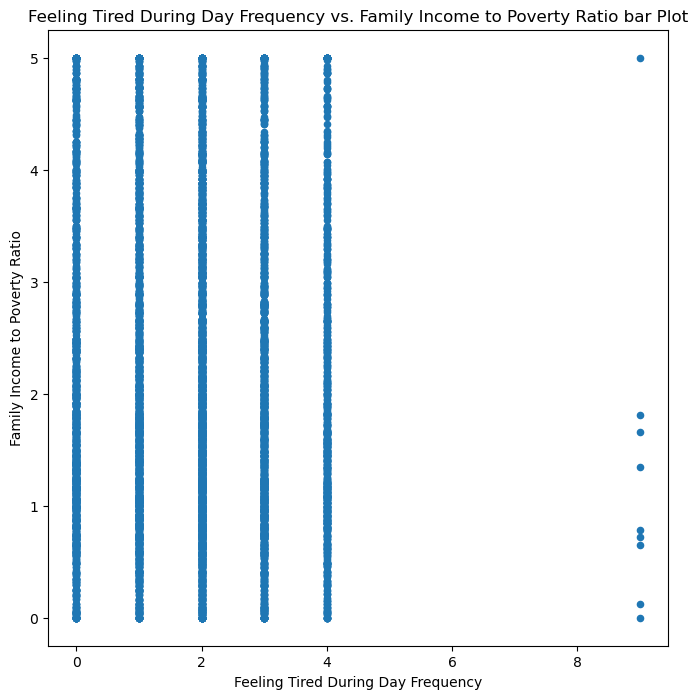

In [8]:
Gender_Dataset.plot(kind="scatter", x="Feeling Tired During Day Frequency", y="Family Income to Poverty Ratio", grid= False, figsize=(8,8),
              title='Feeling Tired During Day Frequency vs. Family Income to Poverty Ratio bar Plot')

#plt.savefig("output_data/Fig1Temp.png")

plt.show()

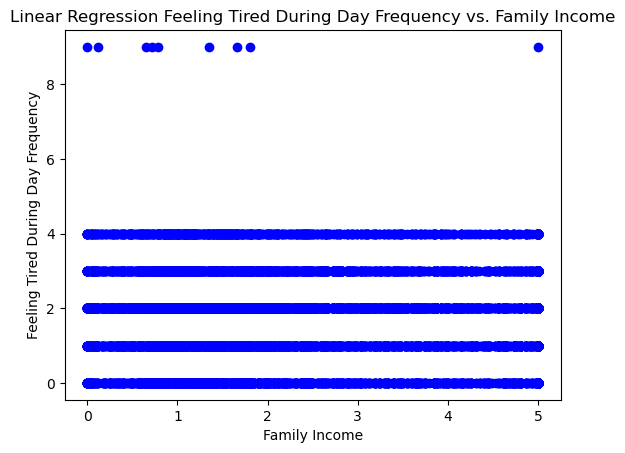

In [9]:
# 26 Linear regression on Northern Hemisphere

# Extract the independent variable (X) and dependent variable (y)
X = Gender_Dataset['Family Income to Poverty Ratio']
y = Gender_Dataset['Feeling Tired During Day Frequency']

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(X, y)

# Calculate the regression line
regression_line = slope * X + intercept

# Create the equation of the regression line
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Plot the scatter plot and regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, regression_line, color='red', label='Linear Regression Line')
plt.annotate(line_eq, (0,-9), fontsize=12, color='red')
plt.xlabel('Family Income')
plt.ylabel('Feeling Tired During Day Frequency')
plt.title('Linear Regression Feeling Tired During Day Frequency vs. Family Income')
#plt.legend()
plt.show()

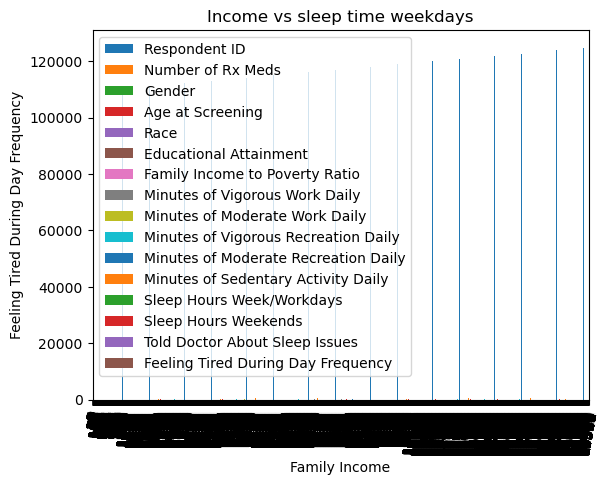

In [10]:
Gender_Dataset.plot(kind="bar")

# Set a title for the chart
plt.title("Income vs sleep time weekdays")
plt.xlabel("Family Income")
plt.ylabel('Feeling Tired During Day Frequency')
plt.xticks(rotation=80)

plt.show()